In [2]:
import numpy as np
import mrc
import matplotlib.pyplot as plt
import scipy.ndimage
from skimage import measure

In [3]:
mrc_lr2 = mrc.readMRC('backup_mrc/VSRCNN-lr5_bs80.mrc')

In [4]:
protein = mrc.readMRC('Train/mrc_files/pdb6hbi.mrc')
tricubic = scipy.ndimage.interpolation.zoom(protein, (1./2), prefilter=False)
tricubic = scipy.ndimage.interpolation.zoom(tricubic, (2/1.), prefilter=False)

In [5]:
print("Grount Truth Shape: %s" % (str(protein.shape)))
print("Tricubic Shape: %s" % (str(tricubic.shape)))
print("Learning rate of 10^-2: %s" % (str(mrc_lr2[8:126-8, 8:126-8, 8:126-8].shape)))

Grount Truth Shape: (110, 110, 110)
Tricubic Shape: (110, 110, 110)
Learning rate of 10^-2: (110, 110, 110)


In [6]:
print("Tricubic: %s" % measure.compare_psnr(protein, tricubic[:,:, :], data_range=15.724161))
print("10^-2:    %s" % measure.compare_psnr(protein, mrc_lr2[8:126-8, 8:126-8, 8:126-8], data_range=15.724161))

Tricubic: 34.83735627424603
10^-2:    33.17015296121441


In [7]:
vmin_orig = mrc_lr2.min()
vmax_orig = mrc_lr2.max()
vmin = vmin_orig + 0*(vmax_orig-vmin_orig)
vmax = vmax_orig - 0.1*(vmax_orig-vmin_orig)

In [8]:
mrc_lr2 = mrc_lr2[8:126-8, 8:126-8, 8:126-8]

Text(0.5, 1.0, 'Ground Truth')

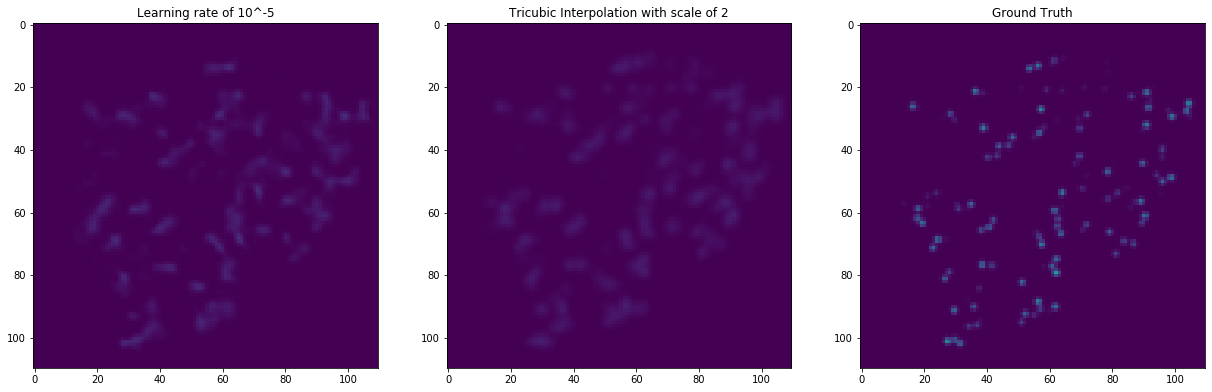

In [9]:
vmin_orig = protein.min()
vmax_orig = protein.max()
vmin = vmin_orig + 0*(vmax_orig-vmin_orig)
vmax = vmax_orig - 0.1*(vmax_orig-vmin_orig)

fig = plt.figure(figsize=(21, 14))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
ax1.imshow(mrc_lr2[int(mrc_lr2.shape[0]/2), :, :],vmin=vmin,vmax=vmax)
ax1.set_title("Learning rate of 10^-5")
ax2.imshow(tricubic[int(tricubic.shape[0]/2), :, :],vmin=vmin,vmax=vmax)
ax2.set_title("Tricubic Interpolation with scale of 2")
ax3.imshow(protein[int(protein.shape[0]/2), :, :],vmin=vmin,vmax=vmax)
ax3.set_title("Ground Truth")

Text(0.5, 1.0, 'Ground Truth')

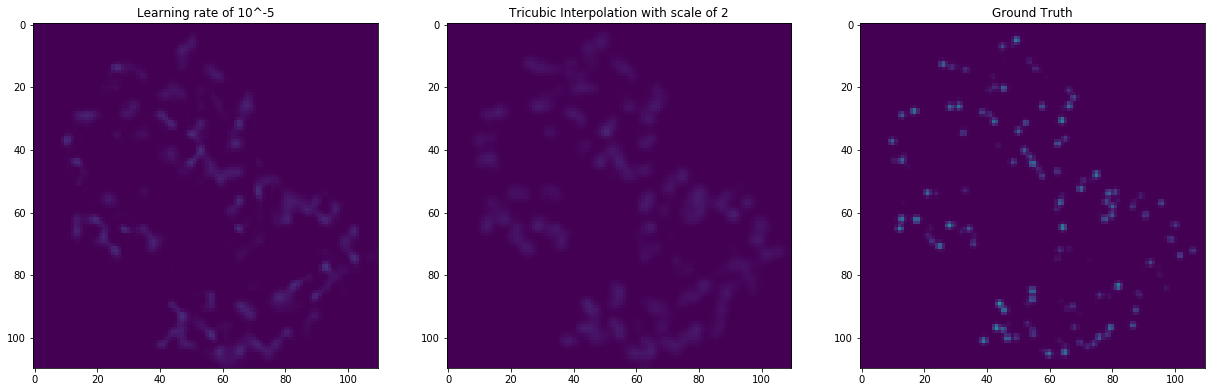

In [10]:
fig = plt.figure(figsize=(21, 14))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)
ax1.imshow(mrc_lr2[:, int(mrc_lr2.shape[1]/2), :],vmin=vmin,vmax=vmax)
ax1.set_title("Learning rate of 10^-5")
ax2.imshow(tricubic[:, int(tricubic.shape[0]/2), :],vmin=vmin,vmax=vmax)
ax2.set_title("Tricubic Interpolation with scale of 2")
ax3.imshow(protein[:, int(protein.shape[0]/2), :],vmin=vmin,vmax=vmax)
ax3.set_title("Ground Truth")